<a href="https://colab.research.google.com/github/AsifKarimShaik/AsifKarimShaik/blob/main/aks22010_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Evaluating Linear Models

-----------------------

**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

-------------------------------

**Your Name Here:Asif Karim Shaik**

Put all of your skills to work on a basic modeling example! And let's see if we can use ChatGPT to help deepen your learning on this topic.

First things first, [Download the CT Real Estate Transactions data here](https://drive.google.com/file/d/12m6UYYt0Osa3JLLfPZRLlBipRUS9ixGd/view?usp=sharing), drag onto your Google Drive, make a shareable link and download it with `!gdown`, then read the dataframe as `df`. Then...


In [ ]:
# here is a nice way to download as a shareable link - you just need to 'steal' the ID of the file and you can use gdown
# after you run this, the file will be downloaded to your local runtime and your are ready to rock!
# of course, local files on your runtime are deleted after you close the session, but this is OK.

# https://drive.google.com/file/d/1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ/view?usp=sharing
!gdown 1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ

Downloading...
From: https://drive.google.com/uc?id=1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ
To: /content/Real_Estate_Sales_2014-2016.csv
100% 15.4M/15.4M [00:00<00:00, 157MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('Real_Estate_Sales_2014-2016.csv')


# Part 1a: Use ChatGPT to generate a regression recipe
I used to give this as the homework, where students had to reference my materials and documentation to solve this notebook. ChatGPT is actually pretty slick  and can generate a basic regression recipe for you. So... why not see what it can do?! Copy and paste these instructions into ChatGPT and ask it to write a Python code to solve this homework. Copy and paste it, update it if needed, and run it.

* Q1) Drop any rows where the `AssessedValue` is greater than 1 million USD
* Q2) Count how many rows have missing values, then drop any rows with missing values.
* Q3) Examine the head of the dataframe and check the column types using .info() to ensure that all numeric columns are appropriately converted as such.
* Q4) Count how many unique values are in the `Town` column.
* Q5) Make a new dataframe called `tmp` of dummy variables for each value in the `Town` column. (hint: this dataframe should have somewhere around 127055 rows and 169 columns, one column for each town).
* Q6) Make a new dataframe called `X` that subsets the `AssessedValue` and `ListYear` from `df`, and concatenate with your dataframe called `tmp`. Hint: This dataframe should have 171 columns.
* Q7) Subset `SaleAmount` from `df` and assign to a variable called `y`.
* Q8) Convert `X` and `y` to numpy arrays. Split your data in X_train, X_test, y_train, y_test using your 7 digit student ID as the random seed and an 80/20 split.
* Q9) Fit a linear regression model. Calculate mean absolute error for each partition.
* Q10) Make a scatterplot of actual vs. predicted values for each partition with nice axis labels, titles and markers. You should use a log axis each axis so that outliers don't dominate your plot.

* `plt.xscale('log')`
* `plt.yscale('log')`

Please use nice subheaders for each question so that your code is easy to review.



## Your ChatGPT Screenshot
Make sure the screenshot of time and date is included in the image.

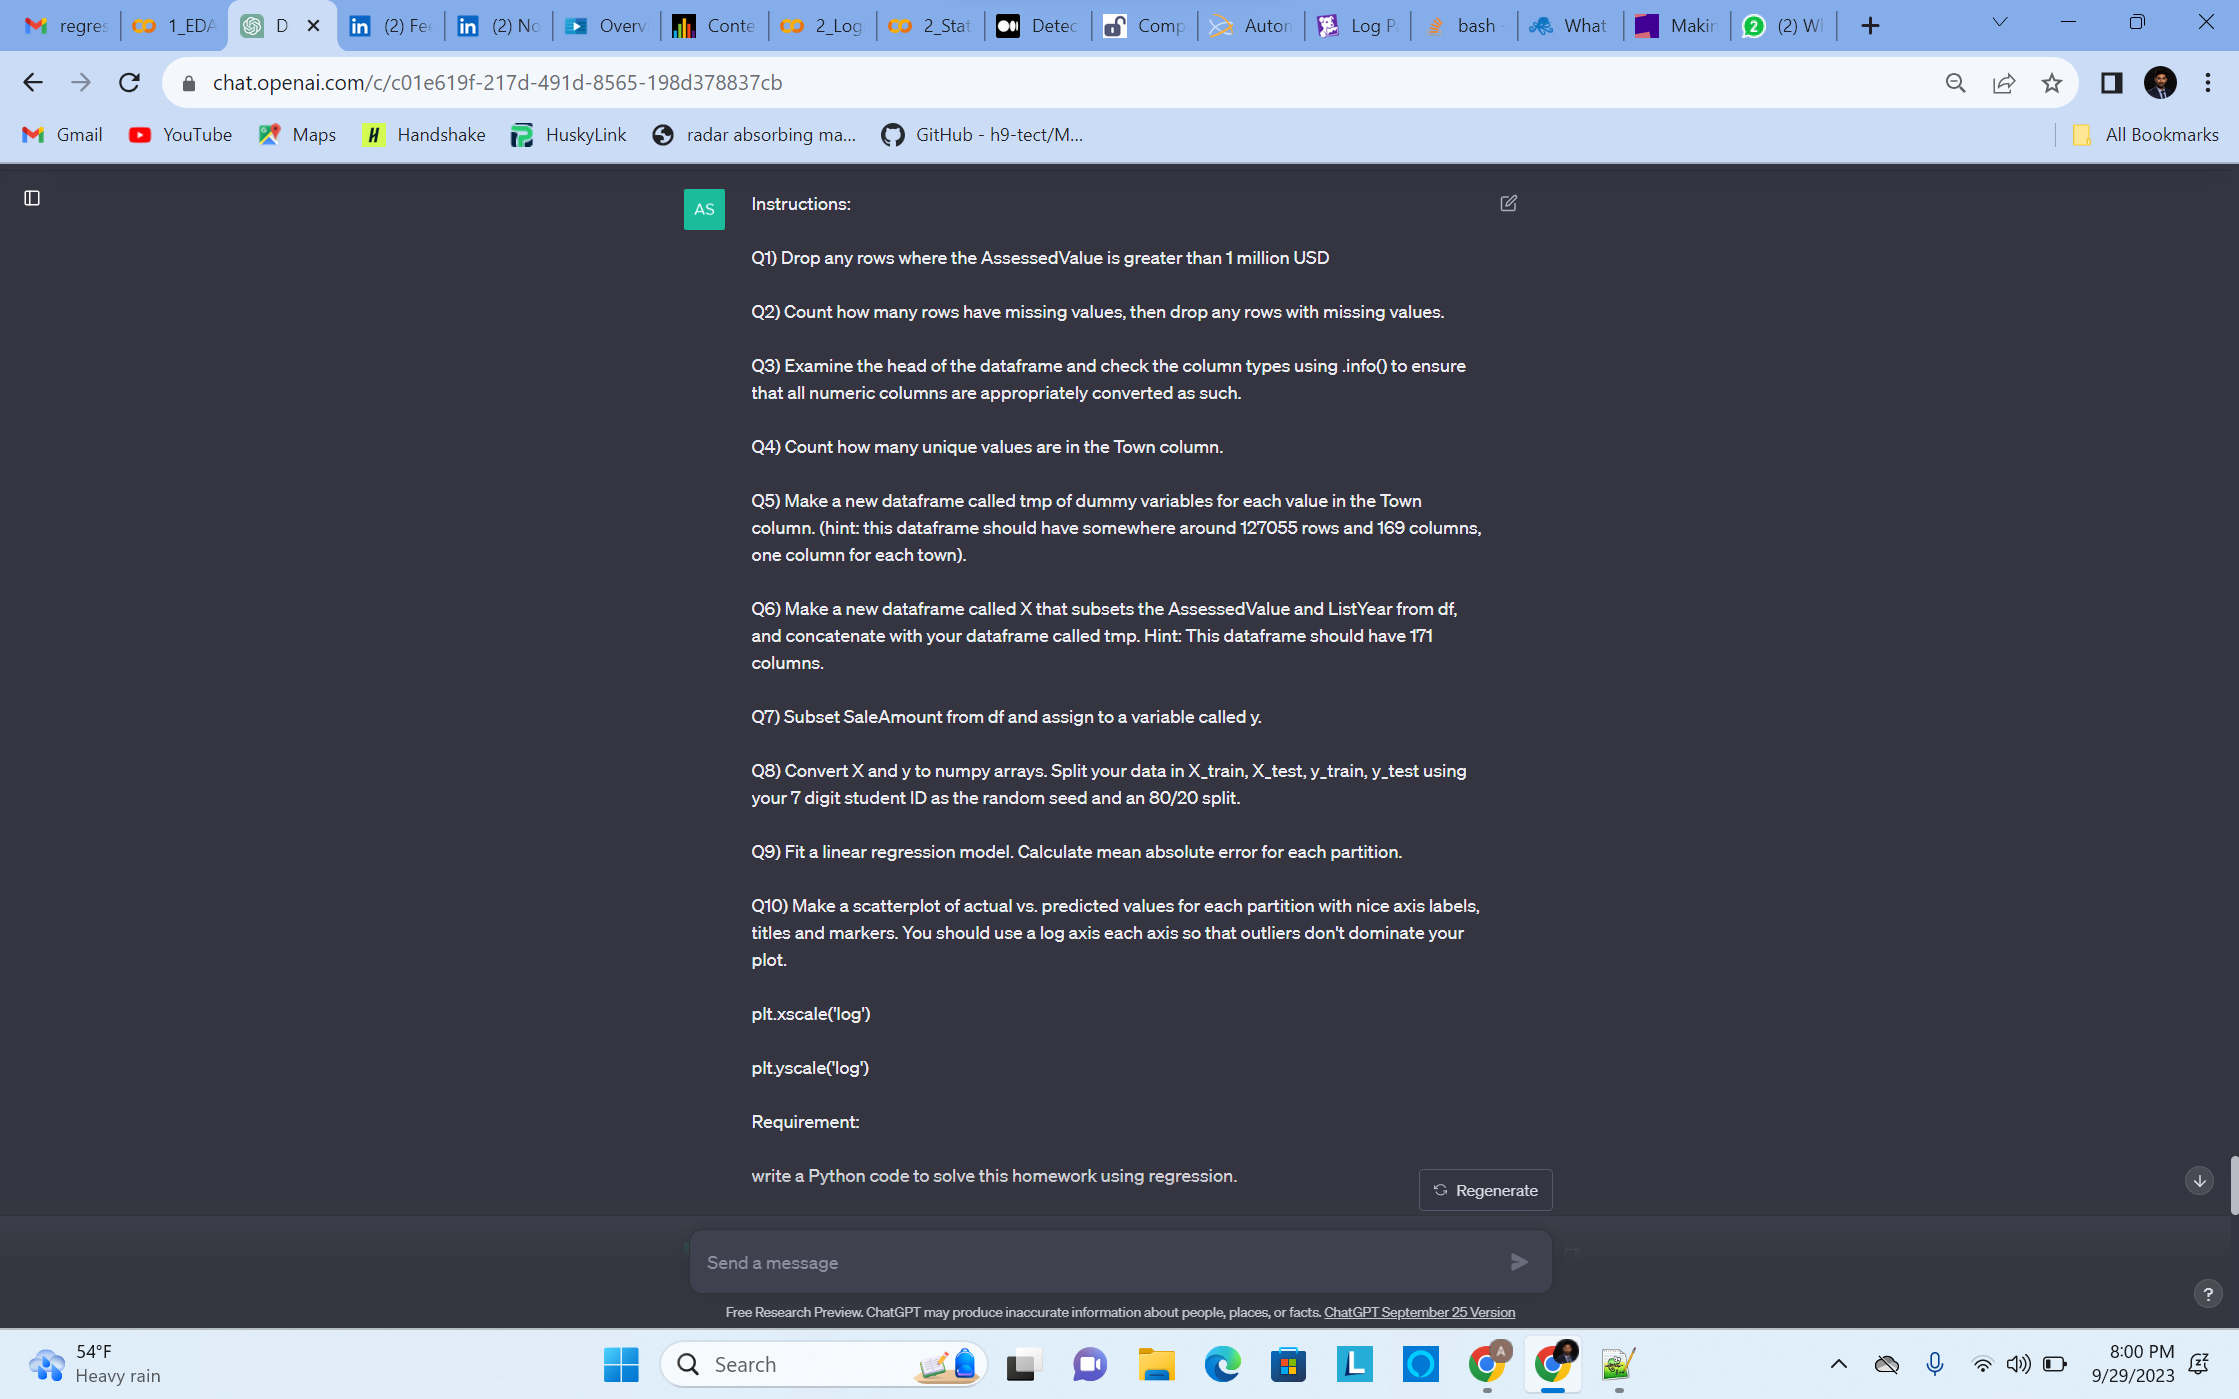

In [ ]:
# students: paste both a screenshot of your prompt and code
# (for academic integrity) and your actual ChatGPT python code here

## Your ChatGPT Code
Don't just copy/paste as one cell, make nice subheaders for each question please.

# Importing the Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Data Cleaning - Exploratory Data Analysis (EDA)

In [ ]:
# Q1) Drop any rows where the AssessedValue is greater than 1 million USD
df = df[df['AssessedValue'] <= 1000000]

In [ ]:
# Q2) Count how many rows have missing values, then drop any rows with missing values.
missing_values_count = df.isnull().sum().sum() # This will give total missing values across the dataframe
print(f"Total Missing Values: {missing_values_count}")

df.dropna(inplace=True)

Total Missing Values: 15031


In [ ]:
# Q3) Examine the head of the dataframe and check the column types
print(df.head())
print(df.info())


   ID  SerialNumber  ListYear DateRecorded     Town            Address  \
1   2         14011      2014    1/14/2015  Andover    1 JUROVATY LANE   
2   3         15006      2015   11/30/2015  Andover        1 ROSE LANE   
3   4         14044      2014    9/28/2015  Andover  10 PINE RIDGE  DR   
4   5         14035      2014    8/10/2015  Andover       101 WALES RD   
5   6         15051      2015    9/28/2016  Andover    107 LAKESIDE DR   

   AssessedValue  SaleAmount  SalesRatio PropertyType ResidentialType  
1         153100    190000.0    0.805789  Residential   Single Family  
2         102900     50000.0    2.058000  Residential   Single Family  
3         108700    128368.0    0.846784  Residential   Single Family  
4         164000    230000.0    0.713043  Residential   Single Family  
5         188400    226000.0    0.833628  Residential   Single Family  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127055 entries, 1 to 145941
Data columns (total 11 columns):
 #   Column 

In [ ]:
# Q4) Count how many unique values are in the Town column.
unique_towns = df['Town'].nunique()
print(f"Number of Unique Towns: {unique_towns}")

Number of Unique Towns: 169


In [ ]:
# Q5) Make a new dataframe called tmp of dummy variables for each value in the Town column.
tmp = pd.get_dummies(df['Town'])

In [ ]:
# Q6) Make a new dataframe called X that subsets the AssessedValue and ListYear from df, and concatenate with your dataframe called tmp.
X = pd.concat([df[['AssessedValue', 'ListYear']], tmp], axis=1)

In [ ]:
# Q7) Subset SaleAmount from df and assign to a variable called y.
y = df['SaleAmount']

# Splitting the Dataframe into the Training and Testing partitions.

In [ ]:
# Q8) Convert X and y to numpy arrays. Split your data
X = X.values
y = y.values

student_id = 1234567  # Replace with your 7 digit student ID
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=student_id)

# Fitting a Linear Regression Model and calculating the Evaluation Metrics

In [ ]:
# Q9) Fit a linear regression model. Calculate mean absolute error for each partition.
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Mean Absolute Error for Training Data: {mae_train}")
print(f"Mean Absolute Error for Testing Data: {mae_test}")

Mean Absolute Error for Training Data: 93457.16956023884
Mean Absolute Error for Testing Data: 88402.45194323063


# Plotting the Actual Vs. Predicted Data for Training and Testing Data.

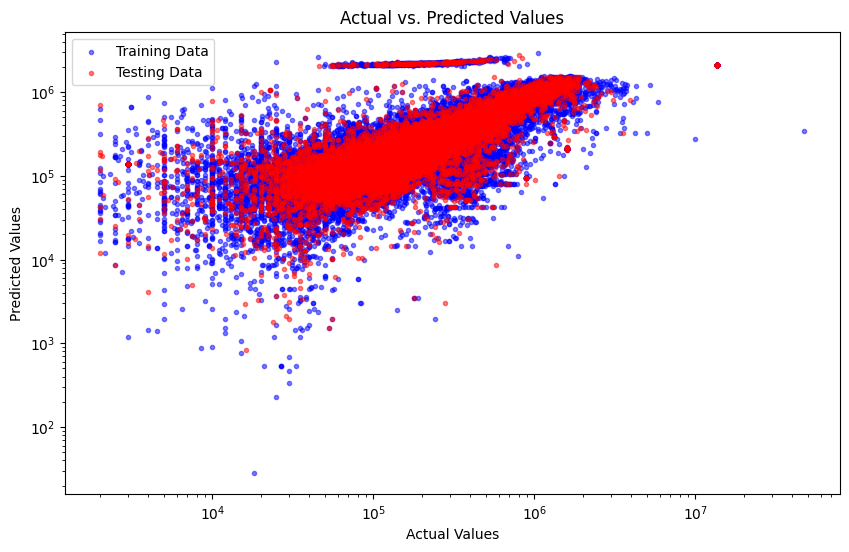

In [ ]:
# Q10) Make a scatterplot of actual vs. predicted values for each partition
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', marker='.', alpha=0.5, label='Training Data')
plt.scatter(y_test, y_test_pred, color='red', marker='.', alpha=0.5, label='Testing Data')
plt.xscale('log')
plt.yscale('log')
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

# Part 1b: Compare and contrast with Dave's regression examples

You now have an AI-generated code vs. the class materials - and I think you would agree both are pretty good! Take some time to the ChatGPT script vs. the class notes and come up with five observations of what is similar vs. different between the two examples. What is in Dave's materials that are not in the AI-generated code? And vice-versa?

### Observation 1

While going through the class material, if you can see the  imported libraries, professor used the seaborn library for plotting, while Chatgpt used matplotlib.pyplot for plotting.

### Observation 2

In the class professor used MinMaxScaler for the transformations, while Chatgpt didn't didn't do any transformations.

### Observation 3

While in the step of splitting the data, Shuffle parameter was used in the class material, but Chatgpt didn't used Shuffle.

### Observation 4

Chatgpt only calculated the MAE, it is similar in both class material and Chatgpt code. Additionally, professor calculated the Mean Squared Error and R2 Score as well.

### Observation 5

In class material professor changed the df into numpy arrays, he used np.arrays, whilst chatgpt used .values function.

# Part 2a: Now ask ChatGPT to generate a classification recipe
With you active ChatGPT open, ask this question (or something similar):

*'Instead of a regression problem, can you update the script to be a classification problem where the target variable is 0/1 based on if the AssessedValue is greater than the mean value in that column?'*

## Your ChatGPT Screenshot
Make sure the screenshot of time and date is included in the image.

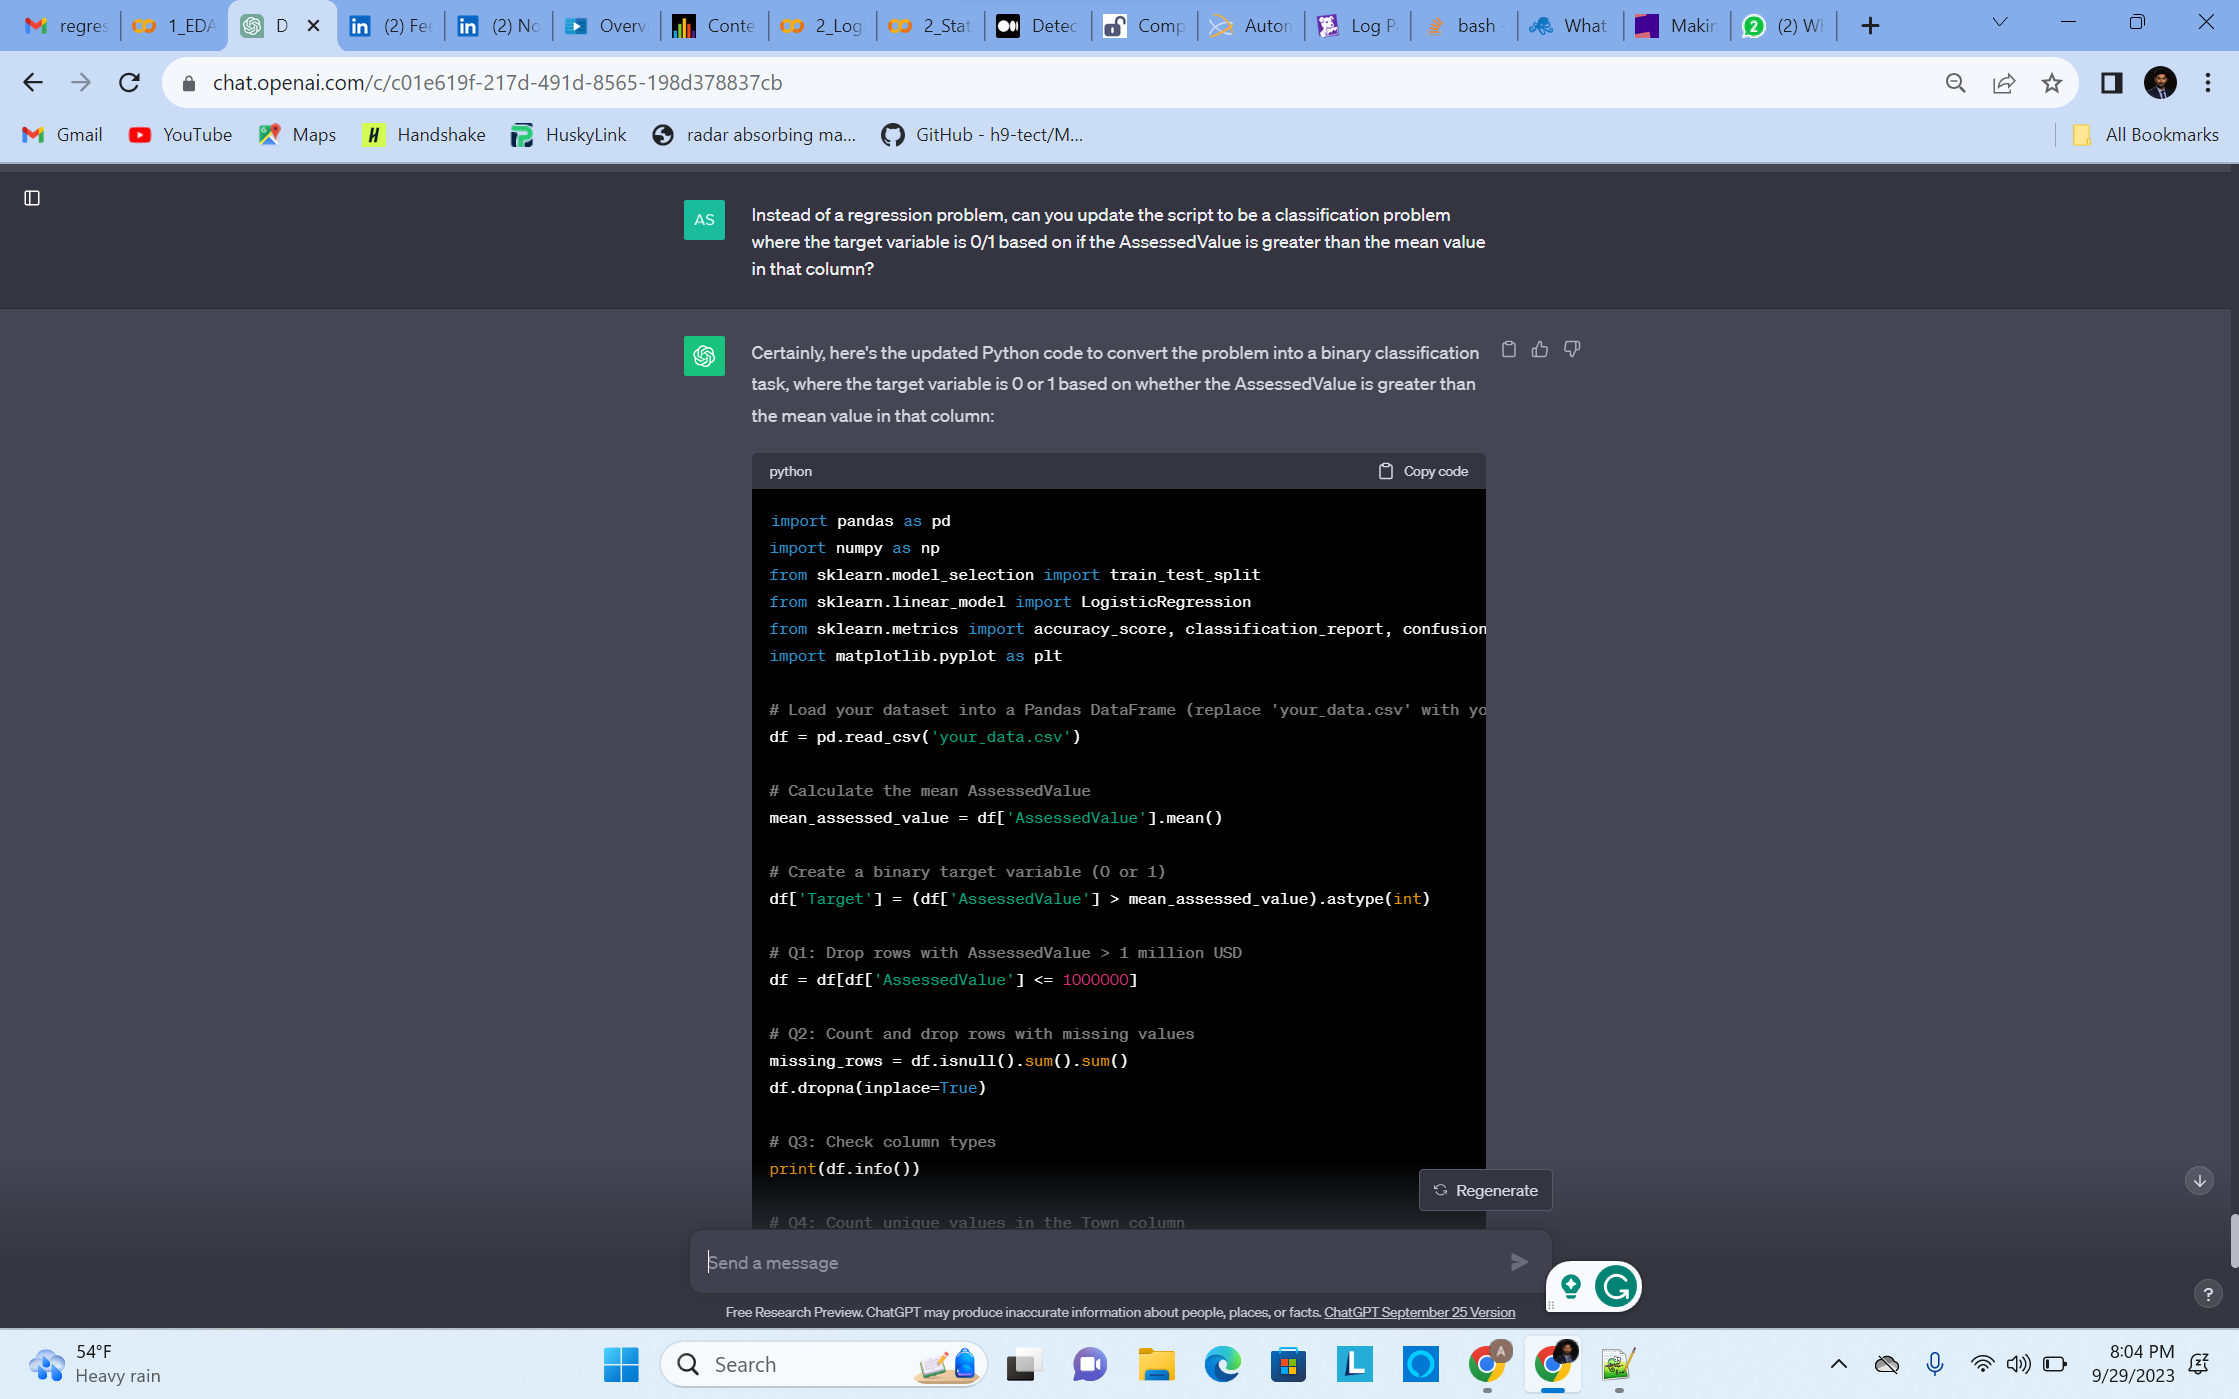

In [ ]:
# students: paste both a screenshot of your prompt and code
# (for academic integrity) and your actual ChatGPT python code here

## Your ChatGPT Code
Don't just copy/paste as one cell, make nice subheaders for each question please.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Performing Data Cleaning - EDA

In [ ]:
# Q1) Drop any rows where the AssessedValue is greater than 1 million USD
df = df[df['AssessedValue'] <= 1000000]

In [ ]:
# Q2) Count how many rows have missing values, then drop any rows with missing values.
missing_values_count = df.isnull().sum().sum() # This will give total missing values across the dataframe
print(f"Total Missing Values: {missing_values_count}")

df.dropna(inplace=True)


Total Missing Values: 0


In [ ]:
# Q3) Examine the head of the dataframe and check the column types
print(df.head())
print(df.info())

   ID  SerialNumber  ListYear DateRecorded     Town            Address  \
1   2         14011      2014    1/14/2015  Andover    1 JUROVATY LANE   
2   3         15006      2015   11/30/2015  Andover        1 ROSE LANE   
3   4         14044      2014    9/28/2015  Andover  10 PINE RIDGE  DR   
4   5         14035      2014    8/10/2015  Andover       101 WALES RD   
5   6         15051      2015    9/28/2016  Andover    107 LAKESIDE DR   

   AssessedValue  SaleAmount  SalesRatio PropertyType ResidentialType  
1         153100    190000.0    0.805789  Residential   Single Family  
2         102900     50000.0    2.058000  Residential   Single Family  
3         108700    128368.0    0.846784  Residential   Single Family  
4         164000    230000.0    0.713043  Residential   Single Family  
5         188400    226000.0    0.833628  Residential   Single Family  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127055 entries, 1 to 145941
Data columns (total 11 columns):
 #   Column 

In [ ]:
# Q4) Count how many unique values are in the Town column.
unique_towns = df['Town'].nunique()
print(f"Number of Unique Towns: {unique_towns}")

Number of Unique Towns: 169


In [ ]:
# Q5) Make a new dataframe called tmp of dummy variables for each value in the Town column.
tmp = pd.get_dummies(df['Town'])

In [ ]:
# Q6) Make a new dataframe called X that subsets the AssessedValue and ListYear from df, and concatenate with your dataframe called tmp.
X = pd.concat([df[['AssessedValue', 'ListYear']], tmp], axis=1)

In [ ]:
# Update the target variable to be binary 0/1 based on the condition
mean_assessed_value = df['AssessedValue'].mean()
y = (df['AssessedValue'] > mean_assessed_value).astype(int)

# Splitting the Data into Training and Testing partitions.

In [ ]:
# Q7) Convert X and y to numpy arrays. Split your data
X = X.values
y = y.values

student_id = 1234567  # Replace with your 7 digit student ID
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=student_id)

# Fitting a Logistic Regression Model and calculating the accuracy

In [ ]:
# Q8) Fit a logistic regression model. Calculate accuracy for each partition.
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy for Training Data: {accuracy_train}")
print(f"Accuracy for Testing Data: {accuracy_test}")

Accuracy for Training Data: 0.9997933965605447
Accuracy for Testing Data: 0.999842587855653


# Plotting a Confusion Matrix

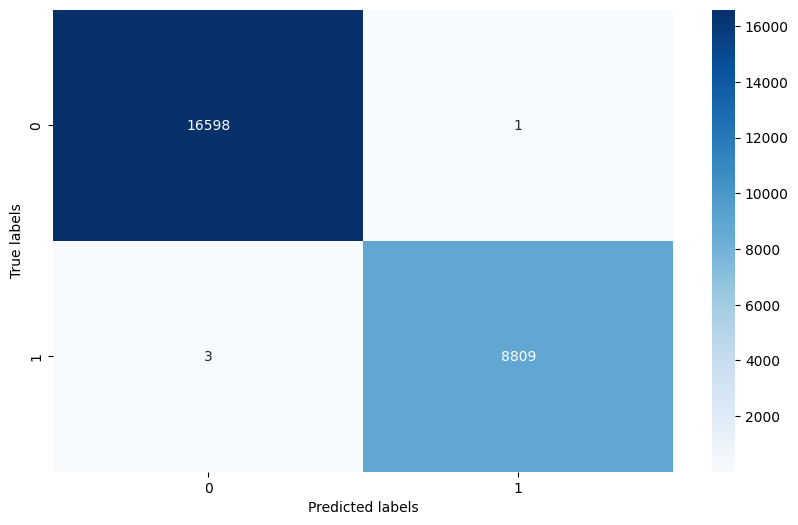

In [ ]:
# Q10) We'll plot a confusion matrix instead of a scatter plot as it's a classification problem.
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Part 2b: Compare and contrast with Dave's classification examples

Again, you now have an AI-generated code vs. the class materials - and I think you would agree both are pretty good! Take some time to the ChatGPT script vs. the class notes and come up with five observations of what is similar vs. different between the two examples. What is in Dave's materials that are not in the AI-generated code? And vice-versa?

### Observation 1

While importing the modules, Chatgpt imported the accuracy_score from sklearn.metrics, but in class material, professor imported classification_report and confusinon_matrix from sklearn.metrics.

### Observation 2

When calling the logistic regression model, professor hasn't used any parameters. While chatgpt used max_iter = 1000.

### Observation 3

After fitting the model, professor checked for RAW PREDICTED PROBABILITIES, which chatgpt didn't do.

### Observation 4

Professor has calculated evaluation metrics such as classification reports, confusion matrix for both the testing and training data, while the Chatgpt calculated confusion matrix for the testing data and plotted a heat map.

### Observation 5

In class material professor calculated  true postitive, true nrgative, false positive and false negative, but Chatgpt didn't calculated these.


# ❗ On Your Own
No one will really care that you can ask ChatGPT to generate some code for you - ChatGPT and similar aids are just tools to help make you a better programmer. So here's what I would do if I were you -

1. Sit down in a quiet place and open a blank notebook.
2. See if you can recreate the code perfectly within 20 minutes. Do this once a day for the entire week.
3. By the end of the week, did you find you were able to code everything in less time? Could you get it down to five minutes? If so, then you really know your stuff!
4. Vanilla regression models are cool, but why not try to  incorporate penalized regression models, or ask ChatGPT to show the coefficients and p-values in the stats models and help you interpret them?!

Feel free to leave your results below if you'd like me to review them.